#### Importing the dataset
#### Source :

In [1]:
import joblib
import numpy as np
import pandas as pd
import sklearn.ensemble as ek
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve,  cross_val_score

# Load the dataset (adjust the file path if necessary)
dataset = pd.read_csv('Dataset/dataset_malwares.csv')
print("\nSetup complete")


Setup complete


In [2]:
total_size = dataset.shape[0]
print("Total number of samples:", total_size)

Total number of samples: 19611


#### About the dataset

In [3]:
dataset['Malware'].value_counts(), dataset.isnull().sum().sum()  # The dataset contains: 14,599 malware samples (labeled as 1) and
                                                                 # 5,012 benign samples (labeled as 0)

(Malware
 1    14599
 0     5012
 Name: count, dtype: int64,
 0)

In [4]:
dataset.head()    #Top 5 row of the dataset

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [5]:
dataset.tail()     #Last 5 row of the dataset

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
19606,clip.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,8,85,0,0,24948,28672,0,0
19607,VNC-Server-6.2.0-Windows.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,10,391,0,0,1413420,1462272,0,18855424
19608,Microsoft.GroupPolicy.Management.ni.dll,23117,0,0,0,0,0,0,0,0,...,3758096448,0,0,0,0,0,0,61440,0,0
19609,cryptuiwizard.dll,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,12,162,8,89008,94904,102400,0,0
19610,winhttp.dll,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,35,226,58,8348,545812,557056,0,0


In [6]:
# summary of numeric attributes
dataset.describe(include="all")

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,19611,19611.0,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.00000,...,1.961100e+04,19611.0,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04
unique,19611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,VirusShare_a878ba26000edaac5c98eff4432723b3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,23117.0,178.615726,71.660752,49.146958,37.370710,37.032635,64178.739687,10.418490,226.46530,...,3.163632e+09,0.0,6.112437,101.912804,14.131865,3.368566e+05,4.047213e+05,5.555810e+05,1.238834e+06,8.814868e+05
std,NaN,0.0,987.200729,1445.192977,1212.201919,864.515405,915.833139,9110.755873,637.116265,1249.68033,...,5.860332e+08,0.0,7.525158,127.076767,154.958102,2.181191e+07,4.704601e+06,6.772167e+06,5.868961e+07,2.167579e+07
min,NaN,23117.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,1.073742e+09,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,...,3.221226e+09,0.0,2.000000,17.000000,0.000000,0.000000e+00,2.960400e+04,4.096000e+04,0.000000e+00,0.000000e+00
50%,NaN,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,...,3.221226e+09,0.0,4.000000,80.000000,0.000000,0.000000e+00,8.222400e+04,1.310720e+05,0.000000e+00,0.000000e+00
75%,NaN,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,...,3.221226e+09,0.0,8.000000,135.000000,0.000000,0.000000e+00,2.477080e+05,3.870720e+05,0.000000e+00,3.184640e+05


In [7]:
# Display the DataFrame in a spreadsheet-like format
display(dataset)

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19606,clip.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,8,85,0,0,24948,28672,0,0
19607,VNC-Server-6.2.0-Windows.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,10,391,0,0,1413420,1462272,0,18855424
19608,Microsoft.GroupPolicy.Management.ni.dll,23117,0,0,0,0,0,0,0,0,...,3758096448,0,0,0,0,0,0,61440,0,0
19609,cryptuiwizard.dll,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,12,162,8,89008,94904,102400,0,0


In [8]:
X = dataset.drop(columns=['Malware'])
feature_names = X.columns  # Save the feature names
print(feature_names)

Index(['Name', 'e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr',
       'e_minalloc', 'e_maxalloc', 'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs',
       'e_lfarlc', 'e_ovno', 'e_oemid', 'e_oeminfo', 'e_lfanew', 'Machine',
       'NumberOfSections', 'TimeDateStamp', 'PointerToSymbolTable',
       'NumberOfSymbols', 'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment',
       'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders',
       'CheckSum', 'SizeOfImage', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes',
       'SuspiciousI

In [9]:
dataset.info()    # info about the whole dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19611 entries, 0 to 19610
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          19611 non-null  object 
 1   e_magic                       19611 non-null  int64  
 2   e_cblp                        19611 non-null  int64  
 3   e_cp                          19611 non-null  int64  
 4   e_crlc                        19611 non-null  int64  
 5   e_cparhdr                     19611 non-null  int64  
 6   e_minalloc                    19611 non-null  int64  
 7   e_maxalloc                    19611 non-null  int64  
 8   e_ss                          19611 non-null  int64  
 9   e_sp                          19611 non-null  int64  
 10  e_csum                        19611 non-null  int64  
 11  e_ip                          19611 non-null  int64  
 12  e_cs                          19611 non-null  int64  
 13  e

#### Visualization

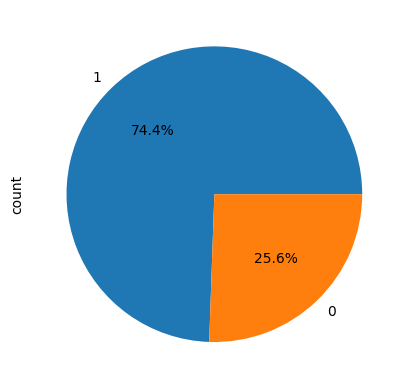

In [10]:
dataset["Malware"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.show()

#### Selecting Key Features Based on Importance Scores using randomforest 

In [11]:
X = dataset.drop(columns=['Name', 'Malware'])  #Droping this because classification model will not accept object type elements (float and int only)
y = dataset['Malware']

Isolates features by dropping the "Malware" target column, then stores feature names in feature_names for consistent reference in training and predictions.

The "Malware" column is dropped because it’s the target label that we’re trying to predict, not a feature. When training a model, only the features (input data) should be used to help the model learn, while the target column is used separately to evaluate its predictions.

In this case:

    Features (input data): The characteristics and attributes of the software file.
    Target (output label): The "Malware" column, which indicates whether the file is malware or benign.

Dropping "Malware" ensures that only the relevant inputs are used for training without including the label that the model is meant to predict.

In [12]:
# Spliting the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

                        Feature  Importance
25           MajorLinkerVersion    0.083446
36  MinorOperatingSystemVersion    0.080198
39        MajorSubsystemVersion    0.074482
46           SizeOfStackReserve    0.072692
19                TimeDateStamp    0.071122
..                          ...         ...
62           SectionMinPhysical    0.000000
60        SectionMaxVirtualsize    0.000000
58            SectionMaxRawsize    0.000000
56            SectionMaxEntropy    0.000000
0                       e_magic    0.000000

[77 rows x 2 columns]


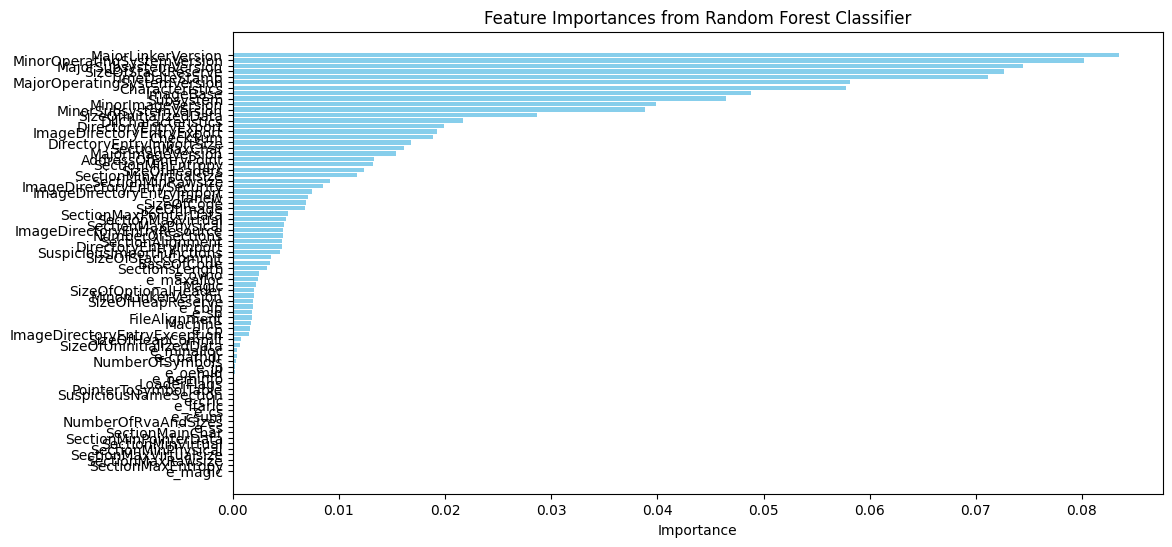

In [13]:
# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Visualize Feature Importances
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Classifier')
plt.gca().invert_yaxis()  # Invert y axis to show the most important features at the top
plt.show()

Features selected (importance > 0.01):
['MajorLinkerVersion' 'MinorOperatingSystemVersion'
 'MajorSubsystemVersion' 'SizeOfStackReserve' 'TimeDateStamp'
 'MajorOperatingSystemVersion' 'Characteristics' 'ImageBase' 'Subsystem'
 'MinorImageVersion' 'MinorSubsystemVersion' 'SizeOfInitializedData'
 'DllCharacteristics' 'DirectoryEntryExport' 'ImageDirectoryEntryExport'
 'CheckSum' 'DirectoryEntryImportSize' 'SectionMaxChar'
 'MajorImageVersion' 'AddressOfEntryPoint' 'SectionMinEntropy'
 'SizeOfHeaders' 'SectionMinVirtualsize']


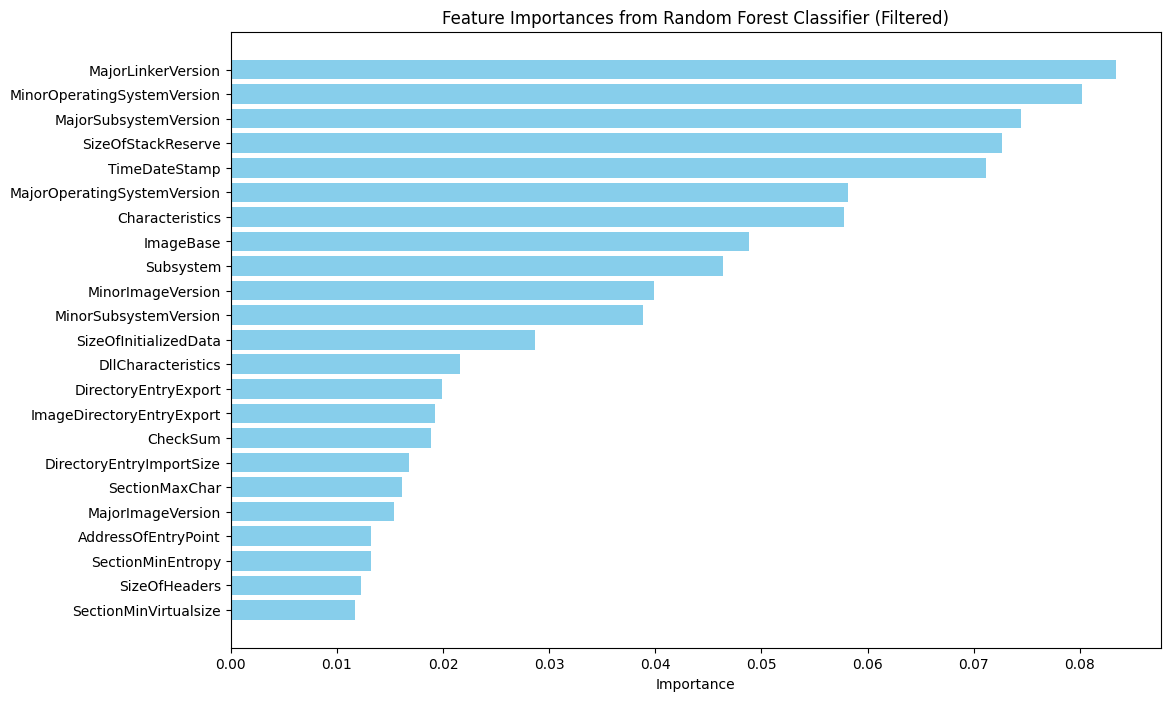

In [14]:
# Set the importance threshold
importance_threshold = 0.01

# Filter features based on the importance threshold
important_features = importance_df[importance_df['Importance'] > importance_threshold]['Feature']
print(f"Features selected (importance > {importance_threshold}):\n{important_features.values}")

# Visualize Feature Importances of Important Features
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'][importance_df['Importance'] > importance_threshold],
         importance_df['Importance'][importance_df['Importance'] > importance_threshold],
         color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Classifier (Filtered)')
plt.gca().invert_yaxis()  # Invert y axis to show the most important features at the top
plt.show()


save this filtered dataset to a CSV file

In [15]:
# To see the dataset with only the important features
# Create a new dataset with only the important features
important_features_list = important_features.tolist()  # Convert to list
important_features_dataset = dataset[important_features_list]  # Filter the dataset

# save this filtered dataset to a CSV file
important_features_dataset.to_csv('filtered_important_features_dataset.csv', index=False)

In [16]:
# Display the list of selected important features, one per line
print("Selected Important Features (importance > 0.01):")
for feature in important_features:
    print(feature) 
print(len(important_features))

Selected Important Features (importance > 0.01):
MajorLinkerVersion
MinorOperatingSystemVersion
MajorSubsystemVersion
SizeOfStackReserve
TimeDateStamp
MajorOperatingSystemVersion
Characteristics
ImageBase
Subsystem
MinorImageVersion
MinorSubsystemVersion
SizeOfInitializedData
DllCharacteristics
DirectoryEntryExport
ImageDirectoryEntryExport
CheckSum
DirectoryEntryImportSize
SectionMaxChar
MajorImageVersion
AddressOfEntryPoint
SectionMinEntropy
SizeOfHeaders
SectionMinVirtualsize
23


#### Testing which Classifiers will give better result

In [17]:
# Create training and testing datasets with only the important features
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

In [18]:
model = { "DecisionTree": DecisionTreeClassifier(max_depth=10),
         "RandomForest":ek.RandomForestClassifier(n_estimators=50)}

In [19]:
results = {}
for algo in model:
    clf = model[algo]
    clf.fit(X_train_important,y_train)
    score = clf.score(X_test_important,y_test)
    print ("%s : %s " %(algo, score))
    results[algo] = score

DecisionTree : 0.9882742798878409 
RandomForest : 0.9926076981901606 


In [20]:
winner = max(results, key=results.get)# Selecting the classifier with good result
print("Using", winner, "for classification, with",len(important_features), 'features.')

Using RandomForest for classification, with 23 features.


😌Now it is clear that we should use RandomForest classification to our model since it gives a better result.

#### Training New Model Based on the important features

In [21]:
# Train a new model with only the important features
rf_model_filtered = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_filtered.fit(X_train_important, y_train)

# Predictions and Evaluation with important features
y_pred_filtered = rf_model_filtered.predict(X_test_important)
print(classification_report(y_test, y_pred_filtered, target_names=['Benign', 'Malware']))

              precision    recall  f1-score   support

      Benign       1.00      0.97      0.98      1003
     Malware       0.99      1.00      0.99      2920

    accuracy                           0.99      3923
   macro avg       0.99      0.99      0.99      3923
weighted avg       0.99      0.99      0.99      3923



#### Saving the model as malwareclassifier.pkl and features to be extracted as features

In [22]:
# Save the New trained model to a file
joblib.dump(rf_model_filtered, 'malwareclassifier-V2.pkl')

['malwareclassifier-V2.pkl']

#### Using Cross-Validation to Assess Model Performance

In [23]:
# Split training data further into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [24]:
# Evaluate training performance
train_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Training scores:", train_scores)
print("Average Training Score:", np.mean(train_scores))

# Evaluate validation performance through cross-validation
val_scores = cross_val_score(rf_model, X_val, y_val, cv=5)  
print("Validation scores:", val_scores)
print("Average Validation Score:", np.mean(val_scores))


Training scores: [0.99203187 0.99243028 0.99282869 0.99003984 0.98924303]
Average Training Score: 0.9913147410358565
Validation scores: [0.98566879 0.99203822 0.99203822 0.98245614 0.97926635]
Average Validation Score: 0.9862935421936427


Results show that both the training and validation scores are quite high, with the following insights:

    Training Scores: The model performs very well on the training set, averaging around 99.13%.

    Validation Scores: The validation performance is also high, averaging around 98.63%.
    
    Off by only 0.51% or 0.051....

Analysis

    No Overfitting: The training and validation scores are close, indicating that our model is likely not overfitting. If the training score were significantly higher than the validation score, it would suggest overfitting.
    
    Slight Underfitting Possibility: Since the validation score is a bit lower than the training score, it could indicate a small underfitting, but it’s minimal.

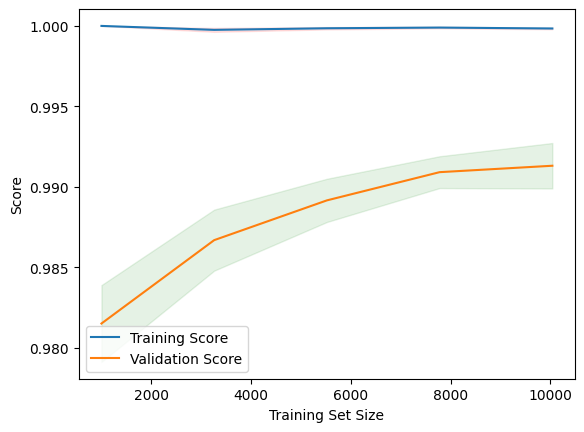

In [25]:
train_sizes, train_scores, val_scores = learning_curve(rf_model, X_train, y_train, cv=5, n_jobs=-1)

# Compute the average and standard deviation of train/validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")

plt.plot(train_sizes, val_mean, label='Validation Score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="g")

plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


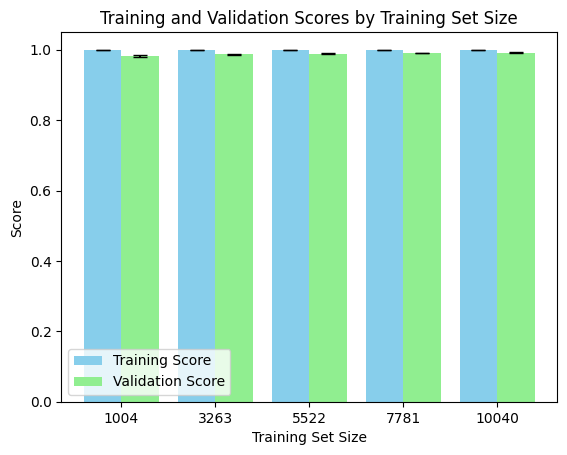

In [26]:
# Set bar width and positions
bar_width = 0.40
train_positions = np.arange(len(train_sizes))
val_positions = train_positions + bar_width

# Plot the bar chart with error bars
plt.bar(train_positions, train_mean, yerr=train_std, width=bar_width, label='Training Score', color='skyblue', capsize=5)
plt.bar(val_positions, val_mean, yerr=val_std, width=bar_width, label='Validation Score', color='lightgreen', capsize=5)

# Add labels and legend
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.xticks(train_positions + bar_width / 2, train_sizes)
plt.legend(loc='best')
plt.title('Training and Validation Scores by Training Set Size')

# Show the plot
plt.show()


In [27]:
# Add this before the visualization code to understand the model structure
print(type(model))
if isinstance(model, dict):
    print("Keys in model dictionary:", model.keys())
    for key, value in model.items():
        print(f"Key: {key}, Type: {type(value)}")

<class 'dict'>
Keys in model dictionary: dict_keys(['DecisionTree', 'RandomForest'])
Key: DecisionTree, Type: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Key: RandomForest, Type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>



             STARTING METRICS EVALUATION

Model is a dictionary. Attempting to find the classifier...
Model keys: dict_keys(['DecisionTree', 'RandomForest'])
Found classifier under key: 'DecisionTree' (by checking methods)
Using classifier of type: <class 'sklearn.tree._classes.DecisionTreeClassifier'>

--- Aligning Features and Generating Predictions ---
Model expects 23 features.
X_test has 77 features before alignment.
X_test aligned to 23 features.
Predictions generated successfully.
Prediction probabilities generated successfully.

--- Generating Classification Metrics ---


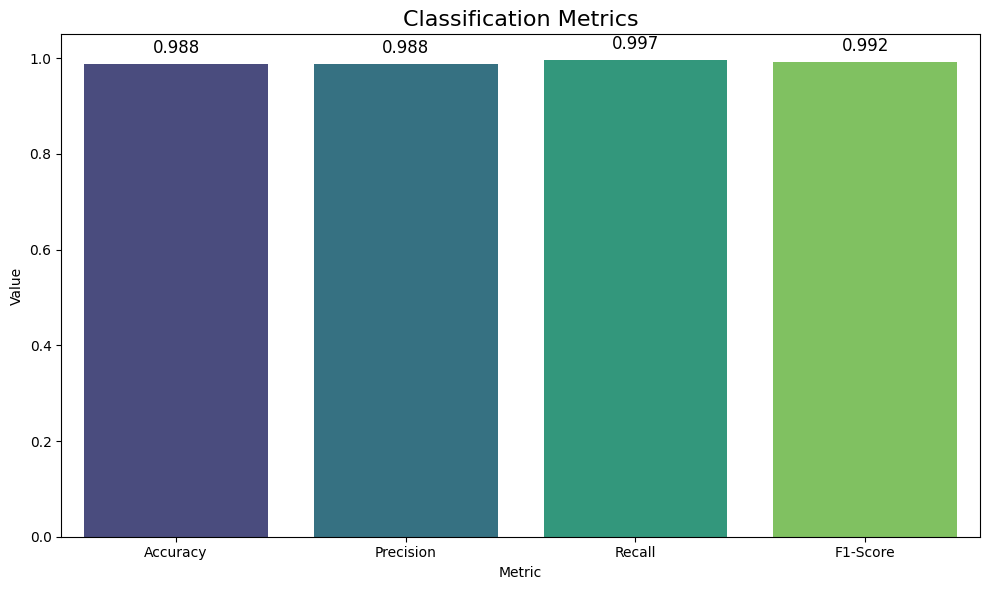


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1003
           1       0.99      1.00      0.99      2920

    accuracy                           0.99      3923
   macro avg       0.99      0.98      0.98      3923
weighted avg       0.99      0.99      0.99      3923



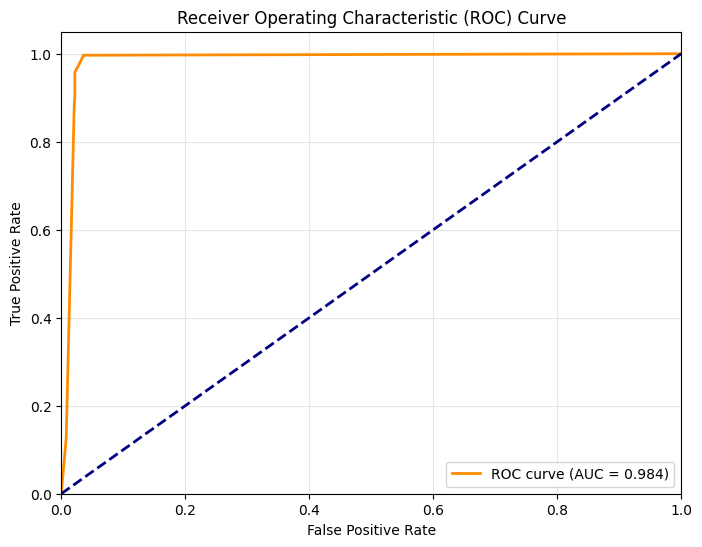


--- Generating Confusion Matrix ---


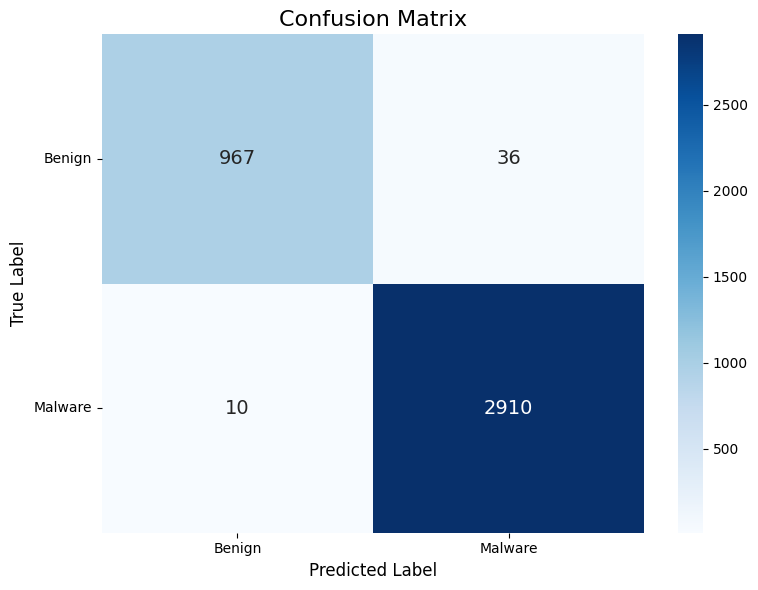


Confusion Matrix Breakdown:
True Negatives (TN): 967 (24.65%) - Correctly identified as Benign
False Positives (FP): 36 (0.92%) - Incorrectly identified as Malware (Type I Error)
False Negatives (FN): 10 (0.25%) - Incorrectly identified as Benign (Type II Error)
True Positives (TP): 2910 (74.18%) - Correctly identified as Malware

--- Generating Feature Importance ---


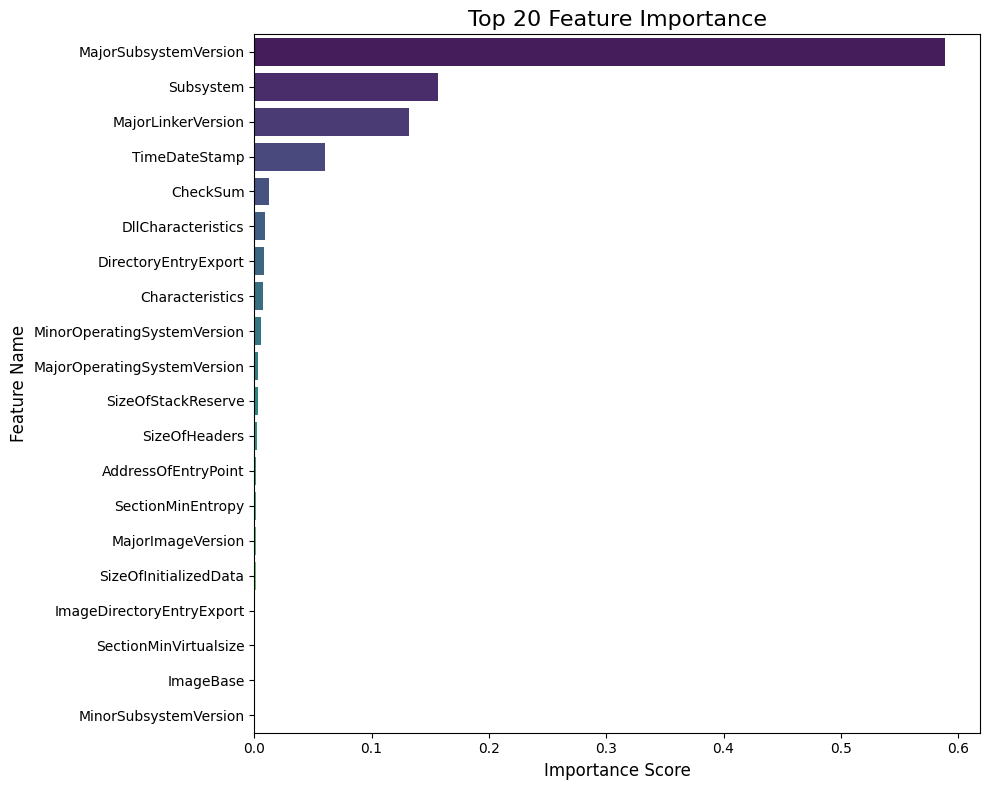

Aligning X for Cross-Validation to 23 features.

--- Performing 5-Fold Cross-Validation (accuracy) ---
CV Scores (accuracy): [0.98776447 0.99082101 0.99005609 0.98495665 0.98878123]
Mean CV Score (accuracy): 0.9885
Standard Deviation (accuracy): 0.0020


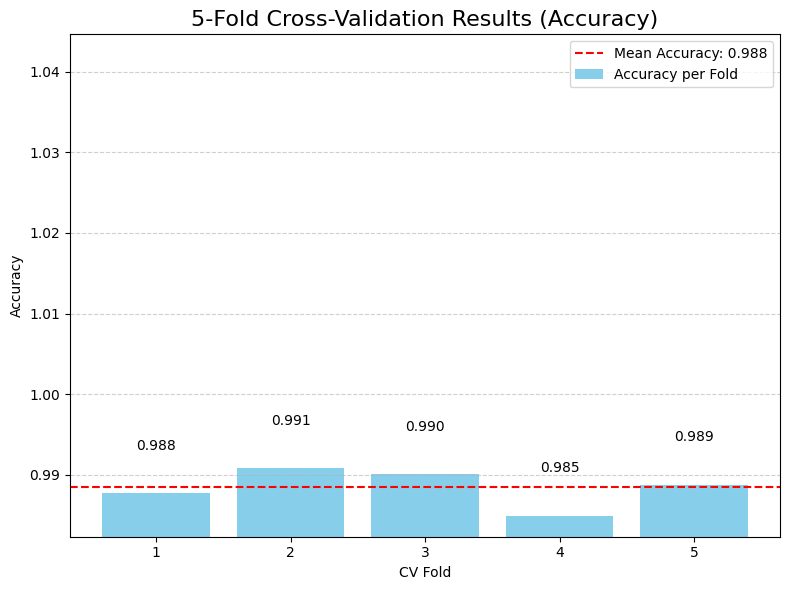


--- Saving Metrics Summary ---
Metrics summary saved successfully to Dataset/model_metrics_summary.json

             METRICS EVALUATION COMPLETE



In [30]:
# ==============================================================================
#                   METRICS VISUALIZATION SECTION
# ==============================================================================

# Add these imports if they are not already at the top of your notebook
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, roc_curve, auc, classification_report)
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import json
import joblib # Make sure joblib is imported if you are loading the model

# ==============================================================================
# Helper Functions for Visualization (Keep these as they were)
# ==============================================================================

def plot_classification_metrics(y_true, y_pred, y_scores=None):
    # ... (function definition remains the same as before) ...
    """Plot comprehensive classification metrics"""
    print("\n--- Generating Classification Metrics ---")
    try:
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, zero_division=0) # Handle zero division
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        # Create metrics dataframe for visualization
        metrics_df = pd.DataFrame({
            'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
            'Value': [accuracy, precision, recall, f1]
        })

        # Plot metrics
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x='Metric', y='Value', data=metrics_df, palette="viridis")
        plt.title('Classification Metrics', fontsize=16)
        plt.ylim(0, 1.05) # Slightly higher limit

        # Add values on top of bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.3f}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=12, xytext=(0, 5),
                        textcoords='offset points')

        plt.tight_layout()
        plt.show()

        # Print classification report
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred, zero_division=0))

        # ROC Curve if scores are provided
        if y_scores is not None:
            plt.figure(figsize=(8, 6))
            fpr, tpr, _ = roc_curve(y_true, y_scores)
            roc_auc = auc(fpr, tpr)

            plt.plot(fpr, tpr, color='darkorange', lw=2,
                     label=f'ROC curve (AUC = {roc_auc:.3f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve')
            plt.legend(loc="lower right")
            plt.grid(alpha=0.3)
            plt.show()
        else:
            print("Probability scores (y_scores) not provided or model doesn't support predict_proba. ROC curve not generated.")

    except Exception as e:
        print(f"Error in plot_classification_metrics: {e}")


def plot_confusion_matrix(y_true, y_pred, classes=['Benign', 'Malware']):
    # ... (function definition remains the same as before) ...
    """Plot confusion matrix with annotations"""
    print("\n--- Generating Confusion Matrix ---")
    try:
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(8, 6))

        # Choose a colormap
        cmap = "Blues" # Or "viridis", "plasma", "magma", etc.

        # Create heatmap
        sns.heatmap(cm, annot=True, fmt='d', cmap=cmap,
                    xticklabels=classes, yticklabels=classes, annot_kws={"size": 14}) # Larger font size

        plt.title('Confusion Matrix', fontsize=16)
        plt.ylabel('True Label', fontsize=12)
        plt.xlabel('Predicted Label', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10, rotation=0) # Keep y-axis labels horizontal
        plt.tight_layout()
        plt.show()

        # Calculate and print detailed metrics from confusion matrix
        tn, fp, fn, tp = cm.ravel()
        total = np.sum(cm)
        print(f"\nConfusion Matrix Breakdown:")
        print(f"True Negatives (TN): {tn} ({tn/total:.2%}) - Correctly identified as Benign")
        print(f"False Positives (FP): {fp} ({fp/total:.2%}) - Incorrectly identified as Malware (Type I Error)")
        print(f"False Negatives (FN): {fn} ({fn/total:.2%}) - Incorrectly identified as Benign (Type II Error)")
        print(f"True Positives (TP): {tp} ({tp/total:.2%}) - Correctly identified as Malware")

    except Exception as e:
        print(f"Error in plot_confusion_matrix: {e}")


def plot_feature_importance(clf, feature_names, top_n=20):
    # ... (function definition remains the same as before) ...
    """Plot feature importance for the model if available"""
    print("\n--- Generating Feature Importance ---")
    if not hasattr(clf, 'feature_importances_'):
        print("Model does not have 'feature_importances_' attribute. Skipping plot.")
        return None
    try:
        importances = clf.feature_importances_
        if feature_names is None or len(feature_names) != len(importances):
             # Use generic names if feature_names are invalid
             feature_names = [f'Feature_{i}' for i in range(len(importances))]
             print("Warning: Invalid or missing feature_names provided. Using generic names.")

        # Create dataframe
        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values('Importance', ascending=False)

        # Display top N features
        top_features = feature_importance_df.head(top_n)

        plt.figure(figsize=(10, max(6, top_n * 0.4))) # Adjust height dynamically
        sns.barplot(x='Importance', y='Feature', data=top_features, palette="viridis")
        plt.title(f'Top {min(top_n, len(feature_names))} Feature Importance', fontsize=16)
        plt.xlabel('Importance Score', fontsize=12)
        plt.ylabel('Feature Name', fontsize=12)
        plt.tight_layout()
        plt.show()

        return feature_importance_df

    except Exception as e:
        print(f"Error in plot_feature_importance: {e}")
        return None


def plot_cross_validation(clf, X, y, cv=5, scoring='accuracy'):
    # ... (function definition remains the same as before) ...
    """Perform and plot cross-validation results"""
    print(f"\n--- Performing {cv}-Fold Cross-Validation ({scoring}) ---")
    try:
        # Ensure X and y are NumPy arrays or DataFrames for consistency
        if not isinstance(X, (np.ndarray, pd.DataFrame)):
            X = np.array(X)
        if not isinstance(y, (np.ndarray, pd.Series)):
            y = np.array(y)

        cv_scores = cross_val_score(clf, X, y, cv=cv, scoring=scoring, n_jobs=-1) # Use all CPU cores

        print(f"CV Scores ({scoring}): {cv_scores}")
        print(f"Mean CV Score ({scoring}): {np.mean(cv_scores):.4f}")
        print(f"Standard Deviation ({scoring}): {np.std(cv_scores):.4f}")

        # Plot results
        plt.figure(figsize=(8, 6))
        plt.bar(range(1, cv + 1), cv_scores, color='skyblue', label=f'{scoring.capitalize()} per Fold')
        mean_score = np.mean(cv_scores)
        plt.axhline(y=mean_score, color='red', linestyle='--',
                    label=f'Mean {scoring.capitalize()}: {mean_score:.3f}')
        plt.xlabel('CV Fold')
        plt.ylabel(scoring.capitalize())
        plt.title(f'{cv}-Fold Cross-Validation Results ({scoring.capitalize()})', fontsize=16)
        plt.ylim(max(0, mean_score - 3 * np.std(cv_scores)), min(1.05, mean_score + 3 * np.std(cv_scores) + 0.05)) # Dynamic y-limits with padding
        plt.xticks(range(1, cv + 1))
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.6)

        # Add text labels
        for i, score in enumerate(cv_scores):
            plt.text(i + 1, score + 0.005, f'{score:.3f}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

        return cv_scores

    except Exception as e:
        print(f"Error in plot_cross_validation: {e}")
        return None

# ==============================================================================
# EXECUTION SECTION: Generate and Plot Metrics
# ==============================================================================

print("\n" + "="*60)
print("             STARTING METRICS EVALUATION")
print("="*60 + "\n")

# --- Configuration: Set these variables correctly! ---
# Ensure these variables exist from your training code:
# model: The variable holding your trained model (might be a dict or the classifier itself)
# X_test: Your test features
# y_test: Your test labels
# X_train: Your training features (needed for feature names)
# X: Your full feature set (for cross-validation)
# y: Your full labels (for cross-validation)

# --- Step 1: Identify and Extract the Classifier ---
actual_classifier = None
if isinstance(model, dict):
    print("Model is a dictionary. Attempting to find the classifier...")
    print("Model keys:", model.keys())
    # --- USER ACTION: Identify the correct key for your classifier below ---
    classifier_key = 'clf' # <<< TRY TO SET THIS CORRECTLY BASED ON ABOVE OUTPUT
    if classifier_key in model and hasattr(model[classifier_key], 'predict'):
        actual_classifier = model[classifier_key]
        print(f"Found classifier under key: '{classifier_key}'")
    else:
        # Fallback: Try common keys or iterate through values
        for possible_key in ['clf', 'classifier', 'model', 'estimator', 'best_estimator_']:
             if possible_key in model and hasattr(model[possible_key], 'predict'):
                 actual_classifier = model[possible_key]
                 print(f"Found classifier under key: '{possible_key}' (fallback)")
                 break
        else: # If still not found, iterate through all values
             for key, value in model.items():
                 if hasattr(value, 'predict') and hasattr(value, 'predict_proba'):
                     actual_classifier = value
                     print(f"Found classifier under key: '{key}' (by checking methods)")
                     break

    if actual_classifier is None:
        raise TypeError("Could not automatically identify the classifier within the 'model' dictionary. "
                        "Please inspect the dictionary keys printed above and assign the correct object "
                        "to the 'actual_classifier' variable manually (around line 215).")
elif hasattr(model, 'predict'):
    print("Model variable seems to be the classifier itself.")
    actual_classifier = model
else:
    raise TypeError("The 'model' variable is not a dictionary or a recognizable classifier object.")

print(f"Using classifier of type: {type(actual_classifier)}")


# --- Step 2: Align Features and Generate Predictions ---
try:
    print("\n--- Aligning Features and Generating Predictions ---")

    # Get feature names the model was trained on
    if hasattr(actual_classifier, 'feature_names_in_'):
        expected_features = actual_classifier.feature_names_in_
        print(f"Model expects {len(expected_features)} features.")

        # Ensure X_test is a DataFrame with columns matching expected_features
        if not isinstance(X_test, pd.DataFrame):
             raise TypeError("X_test must be a pandas DataFrame for feature alignment.")

        print(f"X_test has {X_test.shape[1]} features before alignment.")
        current_features = X_test.columns

        # Identify differences
        unseen_in_test = list(set(expected_features) - set(current_features))
        unseen_at_fit = list(set(current_features) - set(expected_features))

        if unseen_in_test:
             print(f"Warning: X_test is missing {len(unseen_in_test)} features expected by the model: {unseen_in_test[:5]}... "
                   "These will be added with value 0.")
             # Add missing columns with 0 (or another appropriate default)
             for col in unseen_in_test:
                 X_test[col] = 0

        if unseen_at_fit:
             print(f"Warning: X_test has {len(unseen_at_fit)} features not seen during fit: {unseen_at_fit[:5]}... "
                   "These will be removed.")

        # Reindex X_test to match the exact order and columns of training data
        X_test_aligned = X_test[expected_features]
        print(f"X_test aligned to {X_test_aligned.shape[1]} features.")

    else:
        # Fallback if feature_names_in_ is not available
        print("Warning: `feature_names_in_` not found on classifier. Assuming X_test columns are already correct and in order.")
        X_test_aligned = X_test # Proceed without alignment

    # Make predictions using the aligned data
    y_pred = actual_classifier.predict(X_test_aligned)
    print("Predictions generated successfully.")

    # Try to get probability scores if available
    if hasattr(actual_classifier, 'predict_proba'):
        # Use the aligned data for predict_proba as well
        y_scores = actual_classifier.predict_proba(X_test_aligned)[:, 1]
        print("Prediction probabilities generated successfully.")
    else:
        y_scores = None
        print("Model does not support 'predict_proba'. ROC curve cannot be generated.")

except Exception as e:
    print(f"\nError during feature alignment or prediction: {e}")
    print("Troubleshooting:")
    print("1. Ensure 'X_test' is a pandas DataFrame.")
    print("2. Check if the columns in 'X_test' roughly match those used for training.")
    print("3. Verify the 'actual_classifier' variable holds the correct trained model object.")
    raise # Re-raise the exception

# --- Step 3: Plot Metrics ---
# (These functions now use the aligned y_pred and y_scores)
plot_classification_metrics(y_test, y_pred, y_scores)
plot_confusion_matrix(y_test, y_pred)

# --- Step 4: Plot Feature Importance ---
# Determine feature names for plotting
if hasattr(actual_classifier, 'feature_names_in_'):
    feature_names_for_plot = actual_classifier.feature_names_in_
elif 'X_train' in locals() and hasattr(X_train, 'columns'):
    feature_names_for_plot = X_train.columns
elif 'X' in locals() and isinstance(X, pd.DataFrame):
     feature_names_for_plot = X.columns
elif 'X' in locals():
     feature_names_for_plot = [f'Feature_{i}' for i in range(X.shape[1])]
else:
    feature_names_for_plot = None
    print("Warning: Could not determine feature names for importance plot.")

if feature_names_for_plot is not None:
    plot_feature_importance(actual_classifier, feature_names_for_plot)
else:
    print("Skipping feature importance plot due to missing feature names.")


# --- Step 5: Plot Cross-Validation ---
# Ensure X and y (full dataset) are defined
if 'X' in locals() and 'y' in locals():
    # Make sure X for CV has the same features as the trained model expects
    if hasattr(actual_classifier, 'feature_names_in_') and isinstance(X, pd.DataFrame):
         X_cv = X[actual_classifier.feature_names_in_]
         print(f"Aligning X for Cross-Validation to {X_cv.shape[1]} features.")
    else:
         X_cv = X # Assume alignment if no names or not a DataFrame
    cv_scores_list = plot_cross_validation(actual_classifier, X_cv, y, cv=5)
else:
    print("\nSkipping Cross-Validation plot: Full dataset 'X' and 'y' not found.")
    cv_scores_list = None

# --- Step 6: Save Metrics Summary ---
try:
    print("\n--- Saving Metrics Summary ---")
    metrics_summary = {
        'accuracy': float(accuracy_score(y_test, y_pred)),
        'precision': float(precision_score(y_test, y_pred, zero_division=0)),
        'recall': float(recall_score(y_test, y_pred, zero_division=0)),
        'f1_score': float(f1_score(y_test, y_pred, zero_division=0)),
    }
    if y_scores is not None:
         try:
             fpr, tpr, _ = roc_curve(y_test, y_scores)
             metrics_summary['roc_auc'] = float(auc(fpr, tpr))
         except Exception as roc_e:
             print(f"Could not calculate ROC AUC: {roc_e}")
    if cv_scores_list is not None:
         metrics_summary['cv_accuracy_mean'] = float(np.mean(cv_scores_list))
         metrics_summary['cv_accuracy_std'] = float(np.std(cv_scores_list))
         metrics_summary['cv_scores'] = [float(s) for s in cv_scores_list] # Convert numpy floats

    output_path = 'Dataset/model_metrics_summary.json'
    with open(output_path, 'w') as f:
        json.dump(metrics_summary, f, indent=4)
    print(f"Metrics summary saved successfully to {output_path}")

except Exception as e:
    print(f"Error saving metrics summary: {e}")

print("\n" + "="*60)
print("             METRICS EVALUATION COMPLETE")
print("="*60 + "\n")

In [ ]:
# Function to predict malware for a single file
def predict_malware_for_file(file_path):
    """
    Predicts whether a file is malicious using the trained model
    
    Args:
        file_path: Path to the file to analyze
        
    Returns:
        dict: Prediction results with classification and confidence
    """
    import os
    import joblib
    import pandas as pd
    from feature_extraction import extract_features
    
    print(f"Analyzing file: {os.path.basename(file_path)}")
    
    # Step 1: Load the trained model
    model_path = "malwareclassifier-V2.pkl"
    if not os.path.exists(model_path):
        model_path = "ML_model/malwareclassifier-V2.pkl"
    
    try:
        classifier = joblib.load(model_path)
        print(f"Model loaded successfully from {model_path}")
    except Exception as e:
        print(f"Error loading model: {e}")
        return {"error": f"Could not load model: {str(e)}"}
    
    # Step 2: Extract features from the file
    try:
        features_df = extract_features(file_path)
        print(f"Extracted {features_df.shape[1]} features")
        
        # Step 3: Align features with what the model expects
        if hasattr(classifier, 'feature_names_in_'):
            expected_features = classifier.feature_names_in_
            
            # Add missing features with default value 0
            for feature in expected_features:
                if feature not in features_df.columns:
                    features_df[feature] = 0
            
            # Select only the features the model expects, in the right order
            features_df = features_df[expected_features]
            
            print(f"Features aligned to match model requirements ({len(expected_features)} features)")
        
    except Exception as e:
        print(f"Error extracting features: {e}")
        return {"error": f"Feature extraction failed: {str(e)}"}
    
    # Step 4: Make prediction
    try:
        prediction = classifier.predict(features_df)[0]
        
        # Get probability if available
        if hasattr(classifier, 'predict_proba'):
            probabilities = classifier.predict_proba(features_df)[0]
            confidence = probabilities[1] if prediction == 1 else probabilities[0]
        else:
            confidence = None
        
        result = {
            "is_malware": bool(prediction == 1),
            "confidence": float(confidence) if confidence is not None else None,
            "prediction": int(prediction),
            "file_name": os.path.basename(file_path)
        }
        
        print(f"Prediction: {'MALWARE' if result['is_malware'] else 'BENIGN'} "
              f"(Confidence: {result['confidence']:.2%})" if confidence is not None else "")
        
        return result
        
    except Exception as e:
        print(f"Error making prediction: {e}")
        return {"error": f"Prediction failed: {str(e)}"}

# Example usage:
# result = predict_malware_for_file("path/to/your/file.exe")
# print(result)